# Transform Bathymetry.dat to netcdf

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean

In [6]:
def transform_bathymetry(infile, outfile):
    """Transform MOHID Bathymetry.dat to netcdf file
    :arg infile: path of bathymetry dt file
    :arg outfile: desired path with name of output netcdf file and .nc extension
    """
    f = open(infile, 'r')
    grid = np.zeros([896*396])
    begin = False
    counter = 0
    for i, line in enumerate(f):
        if 'GridData2D' in line:
            begin = True
            continue
        if ('GridData2D' in line) and begin:
            break
        elif begin:
            a = float(line.split()[0])
            grid[counter] = a
            counter += 1
    grid = grid.reshape([896, 396])  
    grid = xr.DataArray(grid, coords  = [np.arange(896), np.arange(396)], dims= ['grid_y', 'grid_x'])
    grid = xr.Dataset({'Bathymetry': grid})
    grid.to_netcdf(outfile, format = 'NETCDF4',engine = 'netcdf4')

### Load NEMO-adjusted bathymetry file, 1x- and 4x- MOHID-adjusted version of the NEMO-adjusted bathymetry.

In [8]:
# Load the .dat file for the NEMO-adjusted bathymetry and convert to NetCDF
in_orig = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm.dat'
out_orig = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm.nc'
transform_bathymetry(in_orig, out_orig)


In [9]:
# Load the .dat file for the 1x MOHID adjusted version of the NEMO-adjusted bathymetry and convert to NetCDF
in_v01 = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm_v01.dat'
out_v01 = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm_v01.nc'
transform_bathymetry(in_v01, out_v01)

In [19]:
# Load the .dat file for the 4x MOHID adjusted version of the NEMO-adjusted bathymetry and convert to NetCDF
in_v04 = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm_v04.dat'
out_v04 = '/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702_rdm_v04.nc'
transform_bathymetry(in_v04, out_v04)

In [22]:
bathy_nemo = xr.open_dataset(out_orig)
bathy_mohid_v1 = xr.open_dataset(out_v01)
bathy_mohid_v4 = xr.open_dataset(out_v04)

In [12]:
bathy_nemo

<xarray.Dataset>
Dimensions:     (grid_x: 396, grid_y: 896)
Coordinates:
  * grid_y      (grid_y) int64 0 1 2 3 4 5 6 7 ... 889 890 891 892 893 894 895
  * grid_x      (grid_x) int64 0 1 2 3 4 5 6 7 ... 389 390 391 392 393 394 395
Data variables:
    Bathymetry  (grid_y, grid_x) float64 ...

### Plot NEMO-adjusted grid

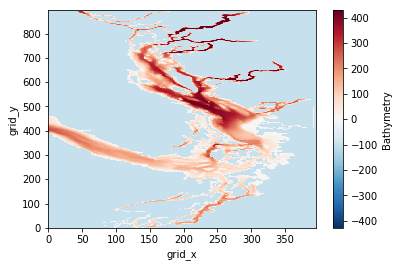

In [14]:
bathy_nemo.Bathymetry.plot()

### Plot difference(s) between NEMO-adjusted grid and MOHID-adjusted grid(s)

In [15]:
bathy_diff_01 = bathy_nemo.Bathymetry - bathy_mohid_v1.Bathymetry

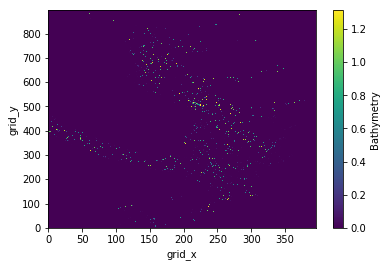

In [20]:
bathy_diff_01.plot()

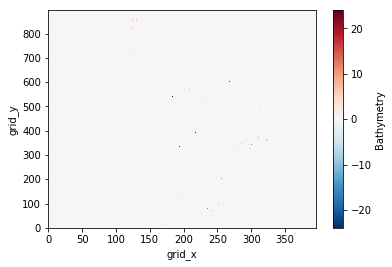

In [23]:
bathy_diff_04 = bathy_nemo.Bathymetry - bathy_mohid_v4.Bathymetry
bathy_diff_04.plot()